

---


## Nonlinear regression

---



In [1]:
# Basic libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

$$\begin{align*} y& =a_3 x^{3}+a_2x^{2}+a_1x +a_0
 \end{align*}$$


In [2]:
"""
x_lim: float
x_min: float
x_max: float
x: ndarray
data: ndarray
y: ndarray
target: ndarray

diseñamos la señal target con ruido gaussiano 

"""# Actual  model of nonlinearity
# data 
x_lim =2*np.pi; x_min =-x_lim; x_max = x_lim
x = np.arange(x_min, x_max, 0.1)
data = np.reshape(x,  (-1, 1) )

# target
a3 = .3; a2 = .2; a1 =.1; a0 = .1 
# #  𝑥³, 𝑥² and 𝑥 as independent variables
y = a3*(x**3) + a2*(x**2) + a1*x + a0 


y_noise = 21 * np.random.normal(size=x.size)
#y_noise = 1 * np.random.normal(size=x.size) ### y1
target = y + y_noise

In [3]:
print(x.size)

126


Linear approximation

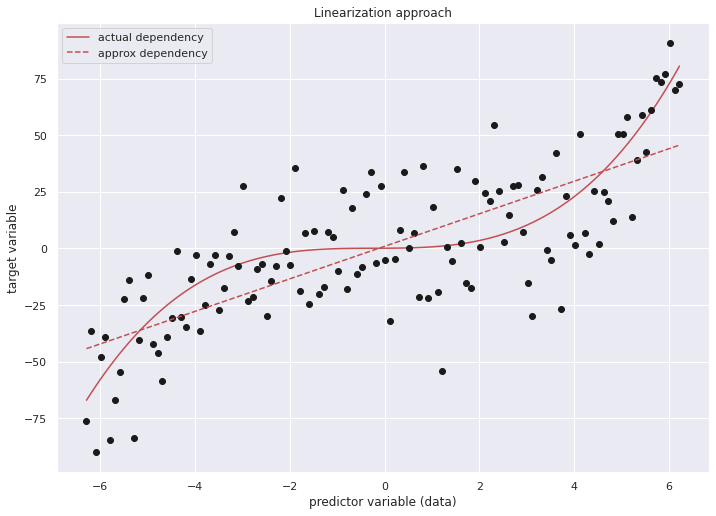

In [4]:
# linearization
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
"""
linear_regression: funcion
target_predicted_lin: ndarray

utilizamos la regresion lineal para hallar la lina de prediccion.
"""
linear_regression = LinearRegression()
linear_regression = LinearRegression().fit(data, target)
linear_regression.score(data, target)
target_predicted_lin = linear_regression.predict(data)

plt.figure(figsize=(11.69,8.27))
plt.plot(data,y, 'r', label='actual dependency')              # actual   nonlinear model
plt.plot(data, target,'ko')        # measured target values
plt.plot(data,target_predicted_lin, 'r--', label='approx dependency')  
plt.title('Linearization approach')
plt.ylabel('target variable')
plt.xlabel('predictor variable (data)')
plt.legend()
plt.show()

Log approximation

$$\begin{align*} y& = a_3 x^{3}+a_2x^{2}+a_1x +a_0\\
\to y &= \log(\sum_{\forall n}a_nx^{n})= \sum_{\forall n\in N}\log(a_n) +\log(x)\sum_{\forall n\in N}n,\quad\textrm{blue line}\\
y&\sim \sum_{\forall n\in N} a_n + \operatorname{antilog}(\sum_{\forall n\in N}n)\log(x),\quad\textrm{yellow line}
 \end{align*}$$

---



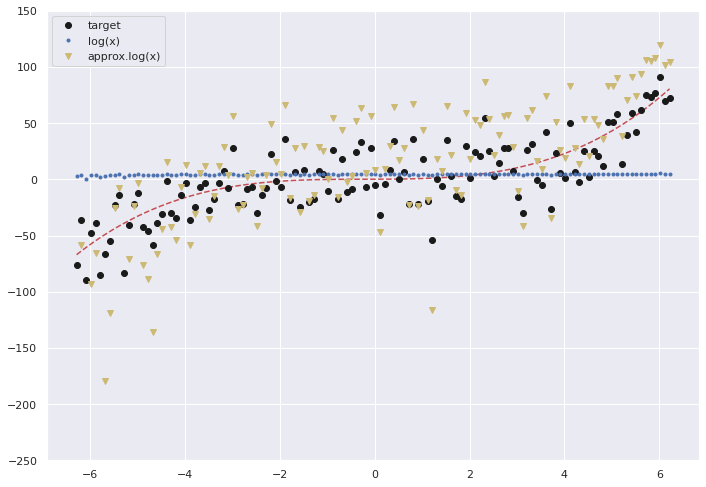

In [5]:
"""
target_0: ndarray
target_log: ndarray
target_app: ndarray

otra manera de hallar una regresion no lineal es usando la aproximacion logaritmica

"""

# log(x)
target_0 = target + np.abs(1.01*np.min(target))
target_log = np.log(target_0)

# approx.log(x)
target_app = (a1+a2+a3) + 148*np.log(target_0)
target_app =  target_app -np.mean(target_app) 

plt.figure(figsize=(11.69,8.27))
plt.plot(data,y, 'r--')              # actual   nonlinear model
plt.plot(data, target,'ko', label='target')        # measured target values
plt.plot(data, target_log,'b.',label='log(x)')        # measured target values
plt.plot(data, target_app,'yv',label='approx.log(x)') 
plt.ylim((-250, 150))
plt.legend()
plt.show()

`note the strong influence of outliers`

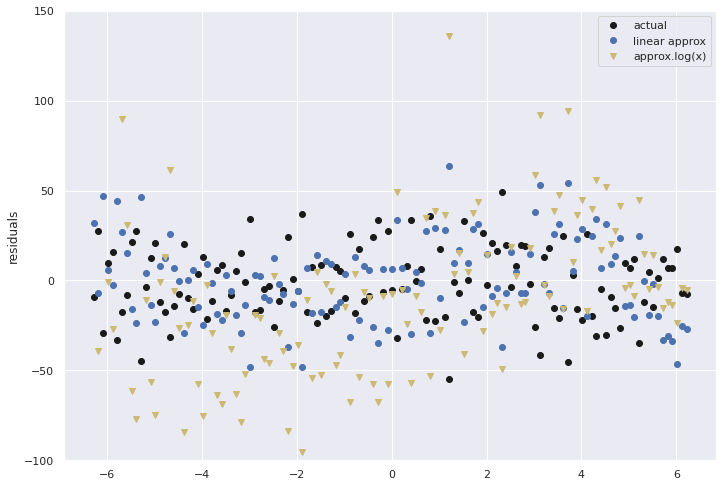

In [6]:
"""

si los datos estan demasiado dispersos, la aproximacion logaritmica no puede predecir una regresion
"""
linear_regression = LinearRegression()
linear_regression = LinearRegression().fit(data, target_app)
linear_regression.score(data, target_app)
target_app_predicted = linear_regression.predict(data)

plt.figure(figsize=(11.69,8.27))
plt.ylabel('residuals')
plt.ylim((-100, 150))
plt.plot(data, target -y,'ko',label='actual') 
plt.plot(data, target_predicted_lin-target,'bo',label='linear approx') 
plt.plot(data, target_app_predicted -target_app,'yv',label='approx.log(x)') 
plt.legend()
plt.show()

In [7]:
print(f"Mean squared error (actual) = {mean_squared_error(target, target-y):.2f}")
print(f"Mean squared error (linear) = {mean_squared_error(target, target_predicted_lin):.2f}")
print(f"Mean squared error (yapprox) = {mean_squared_error(target, target_app_predicted):.2f}")

Mean squared error (actual) = 829.76
Mean squared error (linear) = 522.48
Mean squared error (yapprox) = 1518.89


Piecewise linearization

Mean squared error (DecisionTreeRegressor) = 342.53
Mean squared error (KBinsDiscretizerRegressor) = 444.02


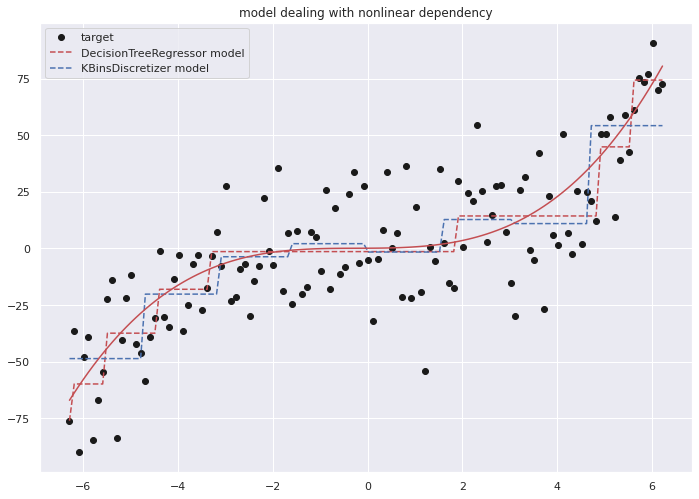

In [14]:
from sklearn.tree import DecisionTreeRegressor
"""
target_predicted_tree: ndarray
target_predicted_Kbins: ndarray

la linealizacion por piezas tambien se usa para hallar una regresion no lineal. 
"""
tree = DecisionTreeRegressor(max_depth=3).fit(data, target)
target_predicted_tree = tree.predict(data)

# Bin continuous data into intervals.
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer

binned_regression = make_pipeline(KBinsDiscretizer(n_bins=8), LinearRegression(),)
binned_regression.fit(data, target)
target_predicted_Kbins = binned_regression.predict(data)

print(f"Mean squared error (DecisionTreeRegressor) = {mean_squared_error(target, target_predicted_tree):.2f}")
print(f"Mean squared error (KBinsDiscretizerRegressor) = {mean_squared_error(target, target_predicted_Kbins):.2f}")

plt.figure(figsize=(11.69,8.27))
plt.title('model dealing with nonlinear dependency')
plt.plot(data, target,'ko', label='target')        # measured target values
plt.plot(data, target_predicted_tree, 'r--',label='DecisionTreeRegressor model') 
plt.plot(data, target_predicted_Kbins, 'b--',label='KBinsDiscretizer model') 
plt.plot(data,y, 'r')              # actual   nonlinear model
plt.legend()
plt.show()

Polynomial feature expansion

In [9]:
data.shape

(126, 1)

In [10]:
"""
data_expanded: ndarray
"""
# adding nonlinear components.
# since N=3,  two new features (data ** 2 and data ** 3)  are created
data_expanded = np.concatenate([data, data ** 2, data ** 3], axis=1)
data_expanded.shape

(126, 3)

Mean squared error (PolynomialFeatures) = 393.33
Mean squared error (Nystroem) = 629.74
Mean squared error (SVR - polynomial) = 396.09
Mean squared error (Gauss) = 377.47


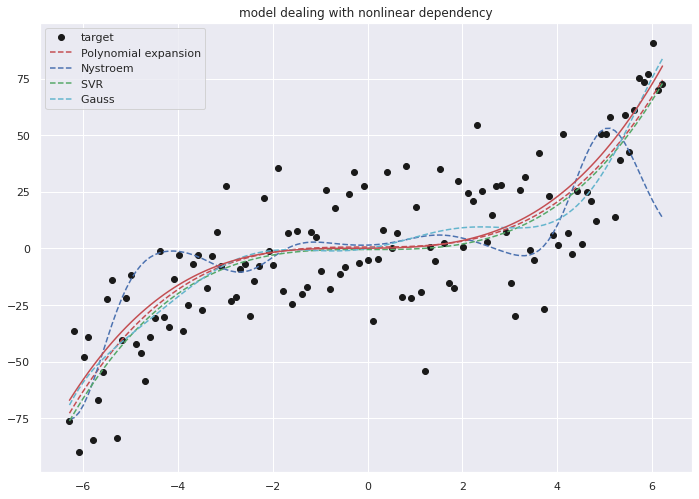

In [11]:
"""
se compara 4 formas de regresion no lineal: kernel, Función de decisión basada localmente,gaussiana y expansion polinomial
se le adiciona a la regresion por expansion polinomial componentes no lineales.
"""


linear_regression.fit(data_expanded, target)
target_predicted_exp = linear_regression.predict(data_expanded)


# Approximate a kernel map using a subset of the training data
from sklearn.kernel_approximation import Nystroem

nystroem_regression = make_pipeline(
    Nystroem(n_components=7), LinearRegression(),
)
nystroem_regression.fit(data, target)
target_predicted_Nys = nystroem_regression.predict(data)
# n_components=6,7,8 hard to tune!

# Locally-based decision function
from sklearn.svm import SVR

svr = SVR(kernel="poly", degree=3)
svr.fit(data, target)
target_predicted_svr = svr.predict(data)

# Gaussian basis functions
    
#Radial Basis Functions We turn to a fit based on exponentiated quadratic (or Gaussian or radial) basis functions:

from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(7),
                            LinearRegression())
gauss_model.fit(data, target)
target_predicted_Gauss = gauss_model.predict(data)

print(f"Mean squared error (PolynomialFeatures) = {mean_squared_error(target, target_predicted_exp):.2f}")
print(f"Mean squared error (Nystroem) = {mean_squared_error(target, target_predicted_Nys):.2f}")
print(f"Mean squared error (SVR - polynomial) = {mean_squared_error(target, target_predicted_svr):.2f}")
print(f"Mean squared error (Gauss) = {mean_squared_error(target, target_predicted_Gauss):.2f}")

plt.figure(figsize=(11.69,8.27))
plt.title('model dealing with nonlinear dependency')
plt.plot(data, target,'ko', label='target')        # measured target values
plt.plot(data, target_predicted_exp, 'r--',label='Polynomial expansion') 
plt.plot(data, target_predicted_Nys, 'b--',label='Nystroem') 
plt.plot(data, target_predicted_svr, 'g--',label='SVR ') 
plt.plot(data, target_predicted_Gauss,'c--',label='Gauss ')
plt.plot(data,y, 'r')              # actual   nonlinear model
plt.legend()
plt.show()

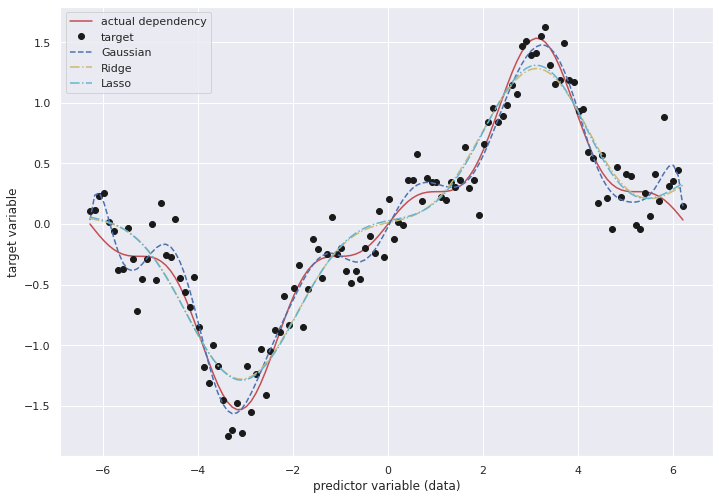

In [12]:
"""
scale: float
sigma: float
y1: ndarray
y_noise1: ndarray
target1: ndarray


comparamos 3 regresiones no lineales, gaussiana, lasso y ridge. 
"""
scale = 2*np.pi; sigma = np.pi/16
y1 = np.sin(np.pi*x/scale) - np.sin(3*np.pi*x/scale)/3 +  np.sin(5*np.pi*x/scale)/5 
y_noise1 = sigma * np.random.normal(size=x.size) ### y1
target1 = y1 + y_noise1

plt.figure(figsize=(11.69,8.27))
plt.plot(data,y1, 'r', label='actual dependency')              # actual   nonlinear model
plt.plot(data, target1,'ko', label='target')        # measured target values
# Gaussian approximation
model = make_pipeline(GaussianFeatures(21),
                      LinearRegression())
model.fit(data, target1)
plt.plot(data, model.predict(data),'b--', label='Gaussian')

# Ridge regression (L2 Regularization)
from sklearn.linear_model import Ridge
model_r = make_pipeline(GaussianFeatures(21), Ridge(alpha=0.3))
model_r.fit(data, target1)
plt.plot(data, model_r.predict(data),'y-.', label='Ridge')

# Lasso regression (L1 regularization)

from sklearn.linear_model import Lasso
model_l = make_pipeline(GaussianFeatures(21), Lasso(alpha=0.001))
model_l.fit(data, target1)
plt.plot(data, model_l.predict(data),'c-.', label='Lasso')

plt.ylabel('target variable')
plt.xlabel('predictor variable (data)')
plt.legend()
plt.show()

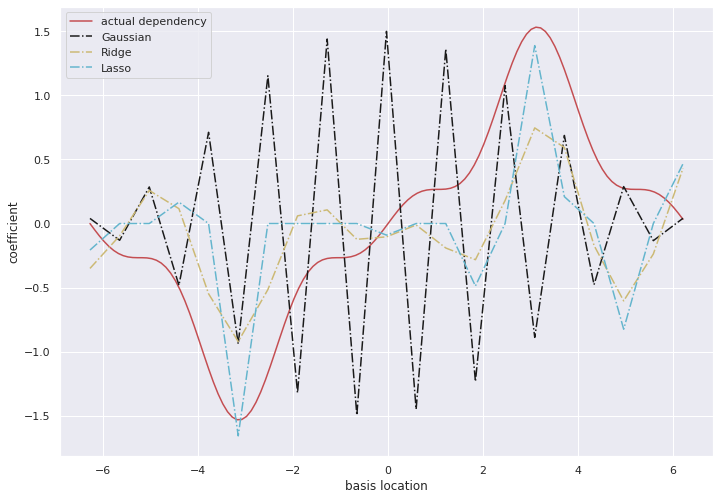

In [13]:
plt.figure(figsize=(11.69,8.27))
plt.plot(data,y1, 'r', label='actual dependency')              # actual   nonlinear model
model.steps[1][1].coef_ = 1.5*model.steps[1][1].coef_/np.max(model.steps[1][1].coef_)
plt.plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_,'k-.', label='Gaussian')
plt.plot(model_r.steps[0][1].centers_,
               model_r.steps[1][1].coef_,'y-.', label='Ridge')
plt.plot(model_l.steps[0][1].centers_,
               model_l.steps[1][1].coef_,'c-.', label='Lasso')
plt.xlabel('basis location')
plt.ylabel('coefficient')
plt.legend()
plt.show()

1.   https://inria.github.io/scikit-learn-mooc/python_scripts/linear_regression_non_linear_link.html
2.   https://scikit-learn.org/stable/modules/linear_model.html
3.   https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html
4.   https://scikit-learn.org/stable/modules/linear_model.html